In [15]:
import os
os.path.abspath(os.getcwd())

'C:\\Users\\suhit'

In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
df = df.dropna(how='any')

In [20]:
print(df.shape)

(406829, 8)


In [21]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [89]:
df["StockCode"].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
84620        1
90038B       1
84551        1
84614A       1
20957        1
Name: StockCode, Length: 3684, dtype: int64

In [90]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [10]:
df["Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [11]:
df[df["Quantity"] <= 0][df["InvoiceNo"] =="C536379"]

C:\Users\suhit\AppData\Local\Temp/ipykernel_19936/2478089956.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Quantity"] <= 0][df["InvoiceNo"] =="C536379"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom


In [91]:
# Filter all rows for which the quantity is less than 0 
df_sales_reversal = df[df['Quantity'] <= 0]

In [92]:
 
# Print the shape of the dataframe
print((df_sales_reversal.shape[0]/df.shape[0])*100)

2.188880340388714


In [7]:
#Only 10624 rows have outlier quantity. Remove these rows from original dataset 
# Filter all rows for which the quantity is less than 0 
df_filtered = df[df['Quantity'] >= 1]


In [8]:
# Print the new dataframe
print(df_filtered.head(15))
  
# Print the shape of the dataframe
print(df_filtered.shape)

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

In [22]:
df_filtered["Total_Cost"] =  df_filtered["Quantity"]*df_filtered["UnitPrice"]

#Group By Country and Description columns 
#grouped_df = df_filtered.groupby(["Country", "Description"]) 

In [23]:
# Create a Month column from Invoice Date 
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])
df_filtered["InvoiceYearMonth"] = df_filtered['InvoiceDate'].dt.year.astype(str) + "-" + df_filtered['InvoiceDate'].dt.month.astype(str)
df_filtered["DayOfWeek"] = df_filtered['InvoiceDate'].dt.day_name()
#df['StartDate'].dt.year.astype(str) + "-" + df['StartDate'].dt.month.astype(str)


In [24]:
df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,InvoiceYearMonth,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday


In [36]:
table = pd.pivot_table(data=df_filtered,index='Description',values='InvoiceNo',aggfunc='count')
table
s_temp = table.sort_values(by=['InvoiceNo'],ascending=False) 
#table.Description.sort_values(ascending=False)

# Get the top ten values
s_top = s_temp.head(10)
s_top


,InvoiceNo
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1724
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1397
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
POSTAGE,1099


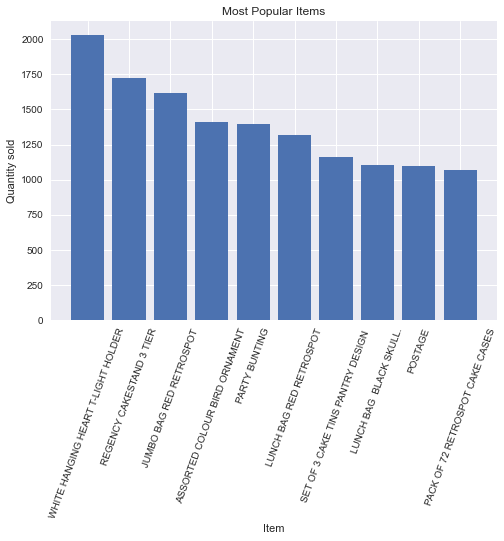

In [37]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
#bar graph
plt.bar(s_top.index,s_top['InvoiceNo'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most Popular Items') 

#save plot 
plt.savefig('matplotlib_plotting_1.png',dpi=300,bbox_inches='tight') 

#display plot 
plt.show();

In [21]:
table = pd.pivot_table(data=df_filtered,index='InvoiceYearMonth',values='Total_Cost',aggfunc='sum')
table

,Total_Cost
InvoiceYearMonth,
2010-12,572713.890
2011-1,569445.040
2011-10,1039318.790
2011-11,1161817.380
2011-12,518192.790
2011-2,447137.350
2011-3,595500.760
2011-4,469200.361
2011-5,678594.560


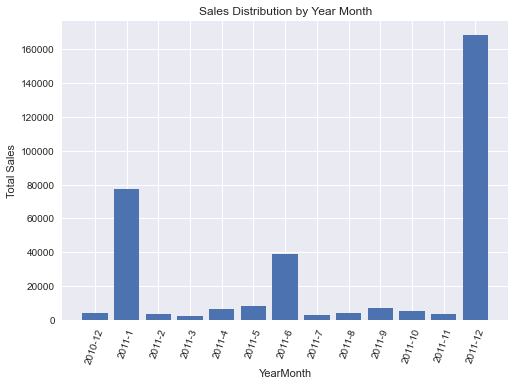

In [38]:
#Sales distribution by year month
plt.style.use('seaborn')
#bar graph
plt.bar(df_filtered["InvoiceYearMonth"], df_filtered["Total_Cost"])
#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('YearMonth') 

#y-axis labels 
plt.ylabel('Total Sales') 

#plot title 
plt.title('Sales Distribution by Year Month') 

#save plot 
plt.savefig('matplotlib_plotting_2.png',dpi=300,bbox_inches='tight') 

#display plot 
plt.show();

In [ ]:
#2011-08 looks abnormal
df_filtered = df_filtered[df_filtered['InvoiceYearMonth'] == "2011-08"]

In [ ]:
df_filtered

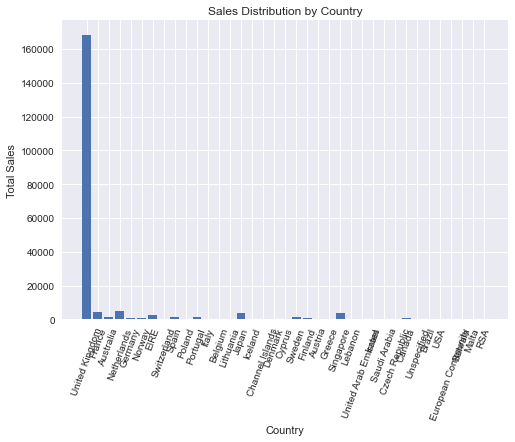

In [39]:
plt.style.use('seaborn')
#bar graph
plt.bar(df_filtered["Country"], df_filtered["Total_Cost"])
#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Country') 

#y-axis labels 
plt.ylabel('Total Sales') 

#plot title 
plt.title('Sales Distribution by Country') 

#save plot 
plt.savefig('matplotlib_plotting_2.png',dpi=300,bbox_inches='tight') 

#display plot 
plt.show();

In [27]:
# Import country by economy; The data is sourced from World Bank;
df_GDP = pd.read_excel("Country_GDP.xlsx")
df_GDP.head()

,Country,Ranking,Economy,Size
0,USA,1.0,United States,20936600.0
1,CHN,2.0,China,14722731.0
2,JPN,3.0,Japan,5064873.0
3,DEU,4.0,Germany,3806060.0
4,GBR,5.0,United Kingdom,2707744.0


In [28]:
# Join GDP data with sales data based on Country columns from both sides to get the GDP Size and Rank of the country by size
merged_df = pd.merge(df_filtered, df_GDP, left_on = "Country", right_on = "Economy")
merged_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_x,Total_Cost,InvoiceYearMonth,Hour,Country_y,Ranking,Economy,Size
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,8,GBR,5.0,United Kingdom,2707744.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,GBR,5.0,United Kingdom,2707744.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,8,GBR,5.0,United Kingdom,2707744.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,GBR,5.0,United Kingdom,2707744.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,GBR,5.0,United Kingdom,2707744.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98417,546533,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2011-03-14 13:53:00,2.10,15388.0,Canada,12.60,2011-3,13,CAN,9.0,Canada,1643408.0
98418,546533,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2011-03-14 13:53:00,0.85,15388.0,Canada,10.20,2011-3,13,CAN,9.0,Canada,1643408.0
98419,546533,21136,PAINTED METAL PEARS ASSORTED,8,2011-03-14 13:53:00,1.69,15388.0,Canada,13.52,2011-3,13,CAN,9.0,Canada,1643408.0
98420,546533,21622,VINTAGE UNION JACK CUSHION COVER,4,2011-03-14 13:53:00,4.95,15388.0,Canada,19.80,2011-3,13,CAN,9.0,Canada,1643408.0


In [42]:
#table_country_rank = pd.pivot_table(data=merged_df,index='Ranking',values='Total_Cost',aggfunc='sum')
#table_country_rank
grouped_by_rank = merged_df.groupby("Ranking", axis="columns")
grouped_by_rank

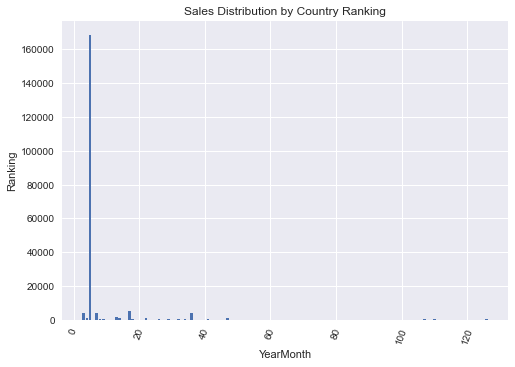

In [43]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

#bar graph
plt.bar(merged_df["Ranking"], merged_df["Total_Cost"])
#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('YearMonth') 

#y-axis labels 
plt.ylabel('Ranking') 

#plot title 
plt.title('Sales Distribution by Country Ranking') 

#save plot 
#plt.savefig('matplotlib_plotting_4.png',dpi=300,bbox_inches='tight') 

#display plot 
plt.show();

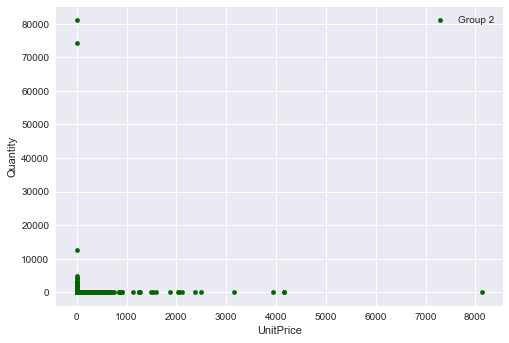

In [44]:
merged_df.plot.scatter(x="UnitPrice", y="Quantity", color="DarkGreen", label="Group 2");

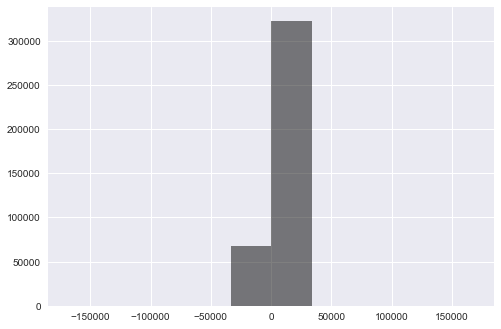

In [45]:
plt.figure();

#merged_df["Quantity"].plot.hist(orientation="horizontal", cumulative=True);
merged_df["Total_Cost"].diff().hist(color="k", alpha=0.5);

In [46]:
import requests

# Where USD is the base currency you want to use
url = 'https://v6.exchangerate-api.com/v6/8979974c5a2aa738e7839189/latest/USD'
#https://v6.exchangerate-api.com/v6/8979974c5a2aa738e7839189/latest/USD

# Making our request
response = requests.get(url)
data = response.text

# Your JSON object
print (data)

{
 "result":"success",
 "documentation":"https://www.exchangerate-api.com/docs",
 "terms_of_use":"https://www.exchangerate-api.com/terms",
 "time_last_update_unix":1651968001,
 "time_last_update_utc":"Sun, 08 May 2022 00:00:01 +0000",
 "time_next_update_unix":1652054401,
 "time_next_update_utc":"Mon, 09 May 2022 00:00:01 +0000",
 "base_code":"USD",
 "conversion_rates":{
  "USD":1,
  "AED":3.6725,
  "AFN":85.8862,
  "ALL":114.4639,
  "AMD":472.9493,
  "ANG":1.7900,
  "AOA":407.5339,
  "ARS":116.0988,
  "AUD":1.4101,
  "AWG":1.7900,
  "AZN":1.6967,
  "BAM":1.8535,
  "BBD":2.0000,
  "BDT":85.6968,
  "BGN":1.8534,
  "BHD":0.3760,
  "BIF":2018.7090,
  "BMD":1.0000,
  "BND":1.3829,
  "BOB":6.8652,
  "BRL":5.0427,
  "BSD":1.0000,
  "BTN":76.9211,
  "BWP":12.2063,
  "BYN":2.7778,
  "BZD":2.0000,
  "CAD":1.2871,
  "CDF":1995.7603,
  "CHF":0.9871,
  "CLP":862.1964,
  "CNY":6.7020,
  "COP":4090.8085,
  "CRC":664.6077,
  "CUP":24.0000,
  "CVE":104.4951,
  "CZK":23.5592,
  "DJF":177.7210,
  "DKK":7

In [47]:
import json

conversion_rates = json.loads(data)
print(conversion_rates)
if "USD" in conversion_rates['conversion_rates']:
    print(conversion_rates['conversion_rates']["USD"])
    #print(student["name"], "marks is: ", student["percentage"])
else:
    print("Key doesn't exist in JSON data")
 


{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1651968001, 'time_last_update_utc': 'Sun, 08 May 2022 00:00:01 +0000', 'time_next_update_unix': 1652054401, 'time_next_update_utc': 'Mon, 09 May 2022 00:00:01 +0000', 'base_code': 'USD', 'conversion_rates': {'USD': 1, 'AED': 3.6725, 'AFN': 85.8862, 'ALL': 114.4639, 'AMD': 472.9493, 'ANG': 1.79, 'AOA': 407.5339, 'ARS': 116.0988, 'AUD': 1.4101, 'AWG': 1.79, 'AZN': 1.6967, 'BAM': 1.8535, 'BBD': 2.0, 'BDT': 85.6968, 'BGN': 1.8534, 'BHD': 0.376, 'BIF': 2018.709, 'BMD': 1.0, 'BND': 1.3829, 'BOB': 6.8652, 'BRL': 5.0427, 'BSD': 1.0, 'BTN': 76.9211, 'BWP': 12.2063, 'BYN': 2.7778, 'BZD': 2.0, 'CAD': 1.2871, 'CDF': 1995.7603, 'CHF': 0.9871, 'CLP': 862.1964, 'CNY': 6.702, 'COP': 4090.8085, 'CRC': 664.6077, 'CUP': 24.0, 'CVE': 104.4951, 'CZK': 23.5592, 'DJF': 177.721, 'DKK': 7.07, 'DOP': 54.9975, 'DZD': 144.9987, 'EGP': 18.4722, 'ERN': 15

In [48]:
# Function to get exchnage rate for a given currency 
def getexchangerate(x):
    conversion_rates = json.loads(data)
    #print(conversion_rates)
    if x in conversion_rates['conversion_rates']:
        return conversion_rates['conversion_rates'][x]
        #print(student["name"], "marks is: ", student["percentage"])
    else:
        return 0     
 

In [49]:
#Calling the function to get exchange rate for a specific currency - "USD"
x = getexchangerate("INR")
print (x)

76.9231


In [50]:
#Calling the function to get exchange rate for a specific currency - "USD"
x = getexchangerate("ABC")
print (x)

0


In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
#df = sns.load_dataset("penguins")
sns.displot(
    df_filtered, x="Total_Cost", col="InvoiceYearMonth", row="Country",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
sales_long = df_filtered.head(100)
sales_subset = 
sns.displot(
    sales_long, x="Total_Cost", col="InvoiceYearMonth", row="Description",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)



In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sales_long[["Quantity","UnitPrice","Country"]]
sns.pairplot(df, hue="Country")

NameError: name 'sales_long' is not defined

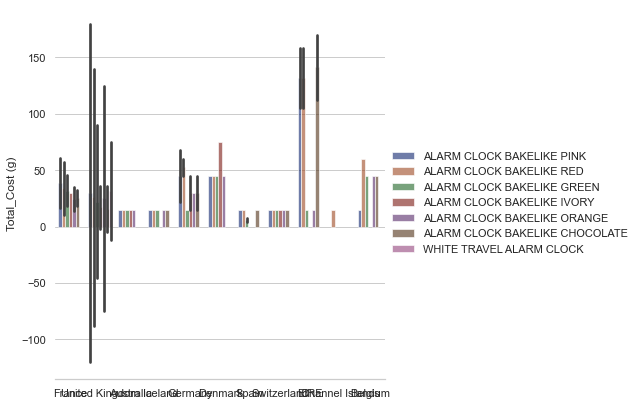

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#penguins = sns.load_dataset("penguins")
#df = df_filtered.head(800)
df_filtered = df_filtered.head(100000)
# Interested only in alarm clocks
df_alarmclock = df_filtered[df_filtered['Description'].str.contains("ALARM CLOCK")] 
        # | df['Description'].str.contains('MIT')] 
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_alarmclock, kind="bar",
    x="Country", y="Total_Cost", hue="Description",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Total_Cost (g)")
g.legend.set_title("")

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
df_lunch = df_filtered[df_filtered['Description'].str.contains("COAT")] 
sns.set_theme(style="darkgrid")
sns.displot(
    df_lunch, x="Total_Cost", col="Description", row="Country",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Total_Cost", y="UnitPrice", data=df_lunch,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_lunch, col="Description", hue="Description", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
#grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

NameError: name 'df_lunch' is not defined

In [26]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#df_sales_reversal = df_sales_reversal.groupby(['Description','Country'])
df_sales_reversal
df_sales_reversal['Quantity'] = df_sales_reversal['Quantity'] * -1
df_sales_reversal_top_category = df_sales_reversal.sort_values('Quantity', ascending=False)
df_sales_reversal_top_category_display = df_sales_reversal_top_category.head(20)


NameError: name 'df_sales_reversal' is not defined

<AxesSubplot:xlabel='Quantity', ylabel='Description'>

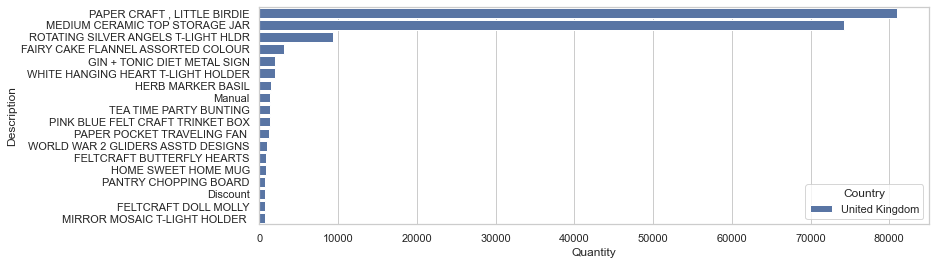

In [26]:
#Sales reversals by category and country
df_sales_reversal_top_category_display.shape
df_sales_reversal_top_category_display
# Draw a nested barplot by category and country
sns.barplot(data=df_sales_reversal_top_category_display,x ='Quantity',y= 'Description',hue='Country')

<AxesSubplot:xlabel='InvoiceYearMonth', ylabel='UnitPrice'>

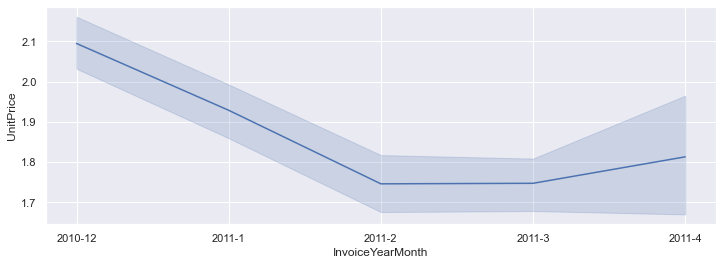

In [15]:
# Inspect how the unit price of T-LIGHT might have trended over time
df_t_light = df_filtered[df_filtered['Description'].str.contains("T-LIGHT")] 
#define figure size
sns.set(rc={"figure.figsize":(12, 4)}) #width=8, height=4
sns.lineplot(data=df_t_light, x="InvoiceYearMonth", y="UnitPrice", markers=True, dashes=False)


In [16]:
df_filtered['Hour'] = df_filtered['InvoiceDate'].dt.hour
df_t_light

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,InvoiceYearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12,8
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,2010-12,9
64,536373,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 09:02:00,4.25,17850.0,United Kingdom,25.50,2010-12,9
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30,2010-12,9
...,...,...,...,...,...,...,...,...,...,...,...
148714,549250,22178,VICTORIAN GLASS HANGING T-LIGHT,6,2011-04-07 12:10:00,1.25,14446.0,United Kingdom,7.50,2011-4,12
148758,549251,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2011-04-07 12:16:00,0.85,14449.0,United Kingdom,10.20,2011-4,12
148781,549251,84978,HANGING HEART JAR T-LIGHT HOLDER,6,2011-04-07 12:16:00,1.25,14449.0,United Kingdom,7.50,2011-4,12
148794,549255,71459,HANGING JAM JAR T-LIGHT HOLDER,192,2011-04-07 12:23:00,0.72,16209.0,United Kingdom,138.24,2011-4,12


<AxesSubplot:xlabel='InvoiceYearMonth', ylabel='Quantity'>

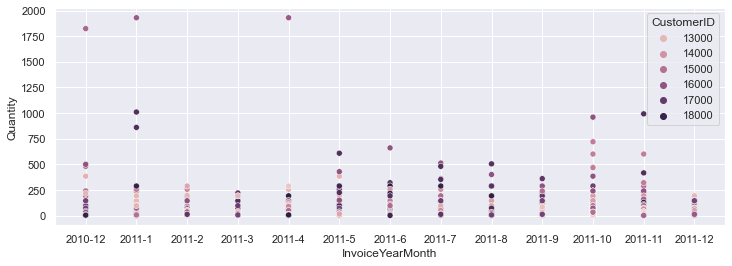

In [23]:
#Most of customers are buying small quantities with a few exceptions 
df_t_light_less_than_10 = df_t_light[df_t_light['Quantity']<1000] 
df_t_light['Quantity'].value_counts()
sns.scatterplot(data=df_t_light, x="InvoiceYearMonth", y="Quantity", hue ='CustomerID')

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

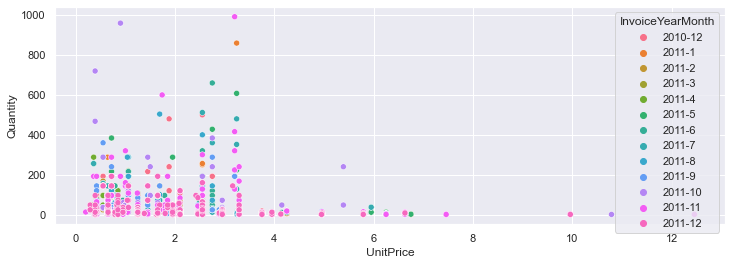

In [43]:
#Quantity and Unit Price are corelated 
df_t_light_less_than_10 = df_t_light[df_t_light['Quantity']<1000] 
df_t_light['Quantity'].value_counts()
sns.scatterplot(data=df_t_light_less_than_10, x="UnitPrice", y="Quantity", hue ='InvoiceYearMonth')

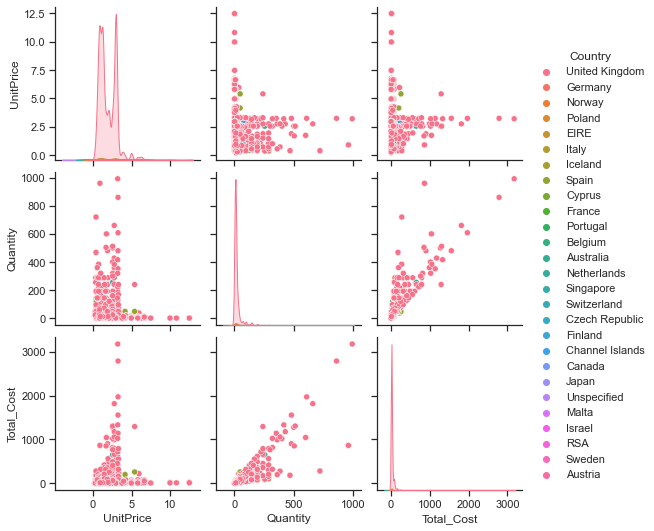

In [46]:
sns.set_theme(style="ticks")
df_t_light_for_display = df_t_light_less_than_10[['InvoiceYearMonth','UnitPrice','Quantity','Country','Total_Cost']]
sns.pairplot(df_t_light_for_display, hue="Country")

<AxesSubplot:>

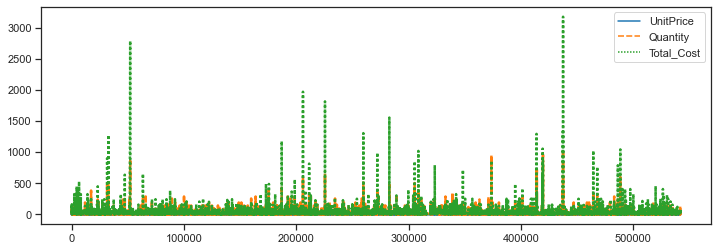

In [47]:
sns.lineplot(data=df_t_light_for_display, palette="tab10", linewidth=2.5)

<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

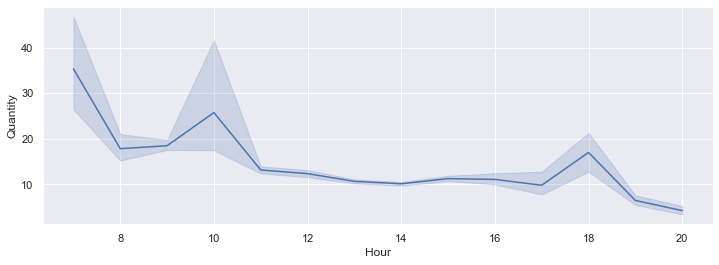

In [22]:
#inspect at what point of the day most of the products are sold 
sns.set(rc={"figure.figsize":(12, 4)}) #width=8, height=4
sns.lineplot(data=df_filtered, x="Hour", y="Quantity", markers=True, dashes=False)

In [24]:
# what products are sold together 
df_duplicate = df_filtered[df_filtered['InvoiceNo'].duplicated(keep=False)]
df_duplicate['product_bundle'] = df_duplicate.groupby('InvoiceNo')['Description'].transform(lambda x:','.join(x))
df_duplicate = df_duplicate[['InvoiceNo','product_bundle']].drop_duplicates()
df_duplicate.shape

C:\Users\suhit\AppData\Local\Temp/ipykernel_22088/1697200959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate['product_bundle'] = df_duplicate.groupby('InvoiceNo')['Description'].transform(lambda x:','.join(x))


(17144, 2)

In [26]:
df_duplicate
from itertools import combinations
from collections import Counter
count = Counter()
for row in df_duplicate['product_bundle'].head(10000):
    row_list = row.split(',')
    #print(row_list)
    count.update(Counter(combinations(row_list,2)))
count.most_common(20)

[(('KEY FOB ', 'KEY FOB '), 444),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 351),
 (('KEY FOB ', ' BACK DOOR '), 278),
 (('KEY FOB ', ' SHED'), 264),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  225),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 214),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  212),
 (('KEY FOB ', ' GARAGE DESIGN'), 204),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 199),
 (('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'), 197),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 196),
 (('KEY FOB ', ' FRONT  DOOR '), 196),
 (('PINK REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 194),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER'), 183),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG CARS BLUE'), 182),
 (('LUNCH BAG CARS BLUE', 'LUNCH BAG PINK POLKADOT'), 180),
 (('SET 3 RETROSPOT TEA',

In [27]:
df_saucer = df_duplicate[df_duplicate['product_bundle'].str.contains("SAUCER")] 
for row in df_saucer['product_bundle'].head(100):
    row_list = row.split(',')
    #print(row_list)
    count.update(Counter(combinations(row_list,2)))
count.most_common(20)

[(('KEY FOB ', 'KEY FOB '), 444),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 353),
 (('KEY FOB ', ' BACK DOOR '), 278),
 (('KEY FOB ', ' SHED'), 265),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  242),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  233),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 214),
 (('KEY FOB ', ' GARAGE DESIGN'), 205),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 201),
 (('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER '), 197),
 (('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'), 197),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 196),
 (('KEY FOB ', ' FRONT  DOOR '), 196),
 (('PINK REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 194),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER'), 185),
 (('LUNCH BAG CARS BLUE', 'LUNCH BAG PINK POLKADOT'), 183),
 (('REGENCY

In [28]:
df_coffee = df_duplicate[df_duplicate['product_bundle'].str.contains("COFFEE")] 
for row in df_coffee['product_bundle'].head(100):
    row_list = row.split(',')
    #print(row_list)
    count.update(Counter(combinations(row_list,2)))
count.most_common(20)

[(('KEY FOB ', 'KEY FOB '), 450),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 353),
 (('KEY FOB ', ' BACK DOOR '), 279),
 (('KEY FOB ', ' SHED'), 268),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  243),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  233),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 215),
 (('KEY FOB ', ' GARAGE DESIGN'), 207),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 203),
 (('KEY FOB ', ' FRONT  DOOR '), 200),
 (('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER '), 198),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 197),
 (('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'), 197),
 (('SET 3 RETROSPOT TEA', 'COFFEE'), 194),
 (('COFFEE', 'SUGAR'), 194),
 (('PINK REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 194),
 (('SET 3 RETROSPOT TEA', 'SUGAR'), 193),
 (('ROSES REGENCY TEACUP AND SAUCER '

In [29]:
#Quantity and Unit Price are corelated 
df_t_light_less_than_10 = df_t_light[df_t_light['Quantity']<1000] 
df_t_light['Quantity'].value_counts()
sns.scatterplot(data=df_t_light_less_than_10, x="Country", y="Quantity", hue ='hour')

ValueError: Could not interpret value `hour` for parameter `hue`

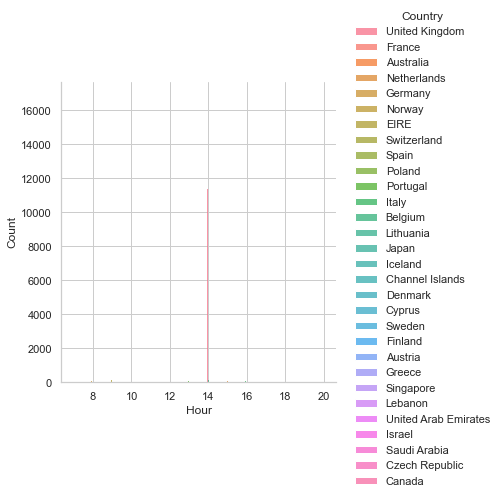

In [33]:
sns.displot(df_filtered, x="Hour", hue="Country", multiple="dodge")


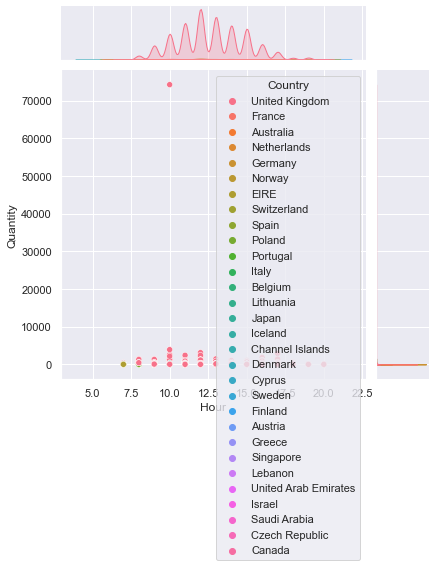

In [36]:
sns.set(rc={"figure.figsize":(24, 8)}) #width=8, height=4
sns.jointplot(data=df_filtered, x="Hour", y="Quantity", hue="Country")

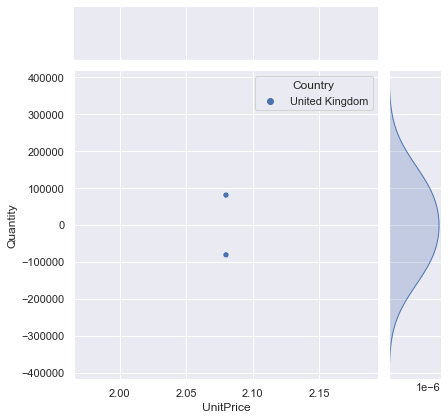

In [47]:
# Filter all rows for which the quantity is less than 0 
df_sales_reversal_paper_craft = df[df['Quantity'] <= 0]
# Inspect how the unit price of T-LIGHT might have trended over time
df_paper_craft = df[df['Description'].str.contains("PAPER CRAFT")] 
#define figure size
sns.set(rc={"figure.figsize":(12, 4)}) #width=8, height=4
#sns.lineplot(data=df_paper_craft, x="InvoiceYearMonth", y="UnitPrice", markers=True, dashes=False)
sns.jointplot(data=df_paper_craft, x="UnitPrice", y="Quantity",hue ="Country")
#sns.scatterplot(x="UnitPrice", y="Quantity", data=df_paper_craft, palette="tab20_r")

In [48]:
df_paper_craft["Quantity"].value_counts()

 80995    1
-80995    1
Name: Quantity, dtype: int64

In [51]:
df_medium_ceramic = df[df['Description'].str.contains("MEDIUM CERAMIC")] 
df_medium_ceramic["Quantity"].value_counts()

 12       79
 48       21
 2        19
 1        14
 3        13
 4        11
 6         9
 24        8
 96        6
 8         6
-1         4
 10        3
 5         3
-12        2
-74215     1
-9         1
 9         1
 240       1
-240       1
 144       1
 288       1
 14        1
-2         1
 74215     1
Name: Quantity, dtype: int64

In [25]:
#inspect at what point of the day most of the products are sold 
sns.set(rc={"figure.figsize":(12, 4)}) #width=8, height=4
sns.jointplot(data=df_filtered, x="DayOfWeek", y="Quantity", hue="Country")
#sns.lineplot(data=df_filtered, x="DayOfWeek", y="Quantity", markers=True, dashes=False)
sns.stripplot(data=df_filtered,
              x="DayOfWeek",
              y="Total_Cost",
              hue="Country",
              dodge=True,    # separate strips of points of different colors
             # order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Strip plot")
plt.show()

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

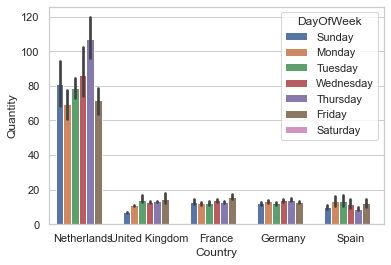

In [27]:
# creating filters of bool series from isin()
filter1 = df_filtered["Country"].isin(["United Kingdom", "France", "Germany","Spain","Netherlands" ])
#filter1 = df_filtered["Country"].isin(["France", "Germany","Spain","Netherlands" ])
df_display = df_filtered[filter1]
# modify the order of day
order_of_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
#Modify hue order
order_of_countries = ['Netherlands', "United Kingdom", "France", "Germany","Spain"]
# Plot the responses for different events and regions
#sns.barplot(x="Country", y="Total_Cost", hue="DayOfWeek", hue_order= order_of_countries,order=order_of_days, estimator=np.mean, data=df_display)
sns.barplot(x="Country", y="Quantity", hue="DayOfWeek", order= order_of_countries,hue_order=order_of_days, estimator=np.mean, data=df_display)

In [28]:
df_filtered["DayOfWeek"].value_counts()

Thursday     80052
Wednesday    68888
Tuesday      66476
Monday       64899
Sunday       62775
Friday       54834
Name: DayOfWeek, dtype: int64

In [13]:
# creating filters of bool series from isin()
filter1 = df_filtered["Country"].isin(["Netherlands"])
#filter1 = df_filtered["Country"].isin(["France", "Germany","Spain","Netherlands" ])

df_netherlands = df_filtered[filter1].sort_values(by=['Quantity'], ascending=False) 
df_netherlands["CustomerID"].value_counts()


14646.0    2080
12759.0      95
12775.0      66
12778.0      50
12802.0      25
12790.0      21
12787.0      20
12789.0       4
12791.0       2
Name: CustomerID, dtype: int64

In [29]:
#One particular customer seems to have a very high Sales Quantity; Removing this customer for a little more 
# balance in the dataset
df_sales_without_14646 = df_display[df_display['CustomerID'] != 14646.0]

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

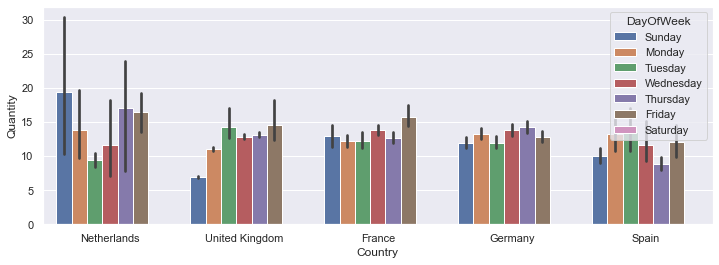

In [34]:
#Plot the sanitized data for any effect. 
sns.set(rc={"figure.figsize":(12, 4)}) #width=8, height=4
#sns.barplot(x="Country", y="Quantity", hue="DayOfWeek", order= order_of_countries,hue_order=order_of_days, estimator=np.mean, data=df_sales_without_14646)
sns.barplot(x="Country", y="Quantity", hue="DayOfWeek", order= order_of_countries,hue_order=order_of_days, data=df_sales_without_14646)